In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import re
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [19]:
df = pd.read_csv("data/ranked-players-with-scores.csv")
df.head()

,current_rank,current_rating,games,losses,name,peak_rating,player_id,ties,total_prize_money,wins,points_for_against
0,1,2190,"1,765",426,David Gibson,2190,1384,5,"$174,982","1,325",433-370
1,2,2148,"1,070",386,Will Anderson,2148,19535,4,"$17,885",680,427-394
2,3,2130,"1,811",474,Nigel Richards,2307,6003,7,"$219,401","1,330",447-392
3,4,2092,744,241,Mack Meller,2092,20383,7,"$7,375",496,434-388
4,5,2081,"3,119","1,040",Ian Weinstein,2081,1847,17,"$34,858","2,062",425-382


In [20]:
df50 = df[df['current_rank']<=50]

In [21]:
df50.head()

,current_rank,current_rating,games,losses,name,peak_rating,player_id,ties,total_prize_money,wins,points_for_against
0,1,2190,"1,765",426,David Gibson,2190,1384,5,"$174,982","1,325",433-370
1,2,2148,"1,070",386,Will Anderson,2148,19535,4,"$17,885",680,427-394
2,3,2130,"1,811",474,Nigel Richards,2307,6003,7,"$219,401","1,330",447-392
3,4,2092,744,241,Mack Meller,2092,20383,7,"$7,375",496,434-388
4,5,2081,"3,119","1,040",Ian Weinstein,2081,1847,17,"$34,858","2,062",425-382


In [22]:
df50.dtypes

current_rank           int64
current_rating         int64
games                 object
losses                object
name                  object
peak_rating            int64
player_id              int64
ties                   int64
total_prize_money     object
wins                  object
points_for_against    object
dtype: object

In [30]:
df50['points_for'] = df50['points_for_against'].str.extract(r"(\d+\b)-", expand=False)
df50['points_against'] = df50['points_for_against'].str.extract(r"-(\d+)", expand=False)
df50

/Users/Ali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Ali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,current_rank,current_rating,games,losses,name,peak_rating,player_id,ties,total_prize_money,wins,points_for_against,points_for,points_against
0,1,2190,"1,765",426,David Gibson,2190,1384,5,"$174,982","1,325",433-370,433,370
1,2,2148,"1,070",386,Will Anderson,2148,19535,4,"$17,885",680,427-394,427,394
2,3,2130,"1,811",474,Nigel Richards,2307,6003,7,"$219,401","1,330",447-392,447,392
3,4,2092,744,241,Mack Meller,2092,20383,7,"$7,375",496,434-388,434,388
4,5,2081,"3,119","1,040",Ian Weinstein,2081,1847,17,"$34,858","2,062",425-382,425,382
5,6,2076,"4,272","1,357",Dave Wiegand,2236,728,14,"$124,964","2,881",444-395,444,395
6,7,2073,"1,177",444,Matthew Tunnicliffe,2073,17175,1,"$17,312",732,423-396,423,396
7,8,2048,"1,494",559,Rafi Stern,2082,2105,3,"$11,540",932,426-392,426,392
8,9,2043,"1,070",311,Eric Tran,2043,19216,2,"$5,649",757,430-376,430,376
9,10,2024,"1,225",448,Kenji Matsumoto,2069,583,3,"$19,805",774,426-395,426,395


In [31]:
df50.dtypes

current_rank           int64
current_rating         int64
games                 object
losses                object
name                  object
peak_rating            int64
player_id              int64
ties                   int64
total_prize_money     object
wins                  object
points_for_against    object
points_for            object
points_against        object
dtype: object

In [38]:
df50['points_for'] = df50.points_for.astype(float)
df50['points_against'] = df50.points_against.astype(float)
df50.dtypes

/Users/Ali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Ali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


current_rank            int64
current_rating          int64
games                  object
losses                 object
name                   object
peak_rating             int64
player_id               int64
ties                    int64
total_prize_money      object
wins                   object
points_for_against     object
points_for            float64
points_against        float64
dtype: object

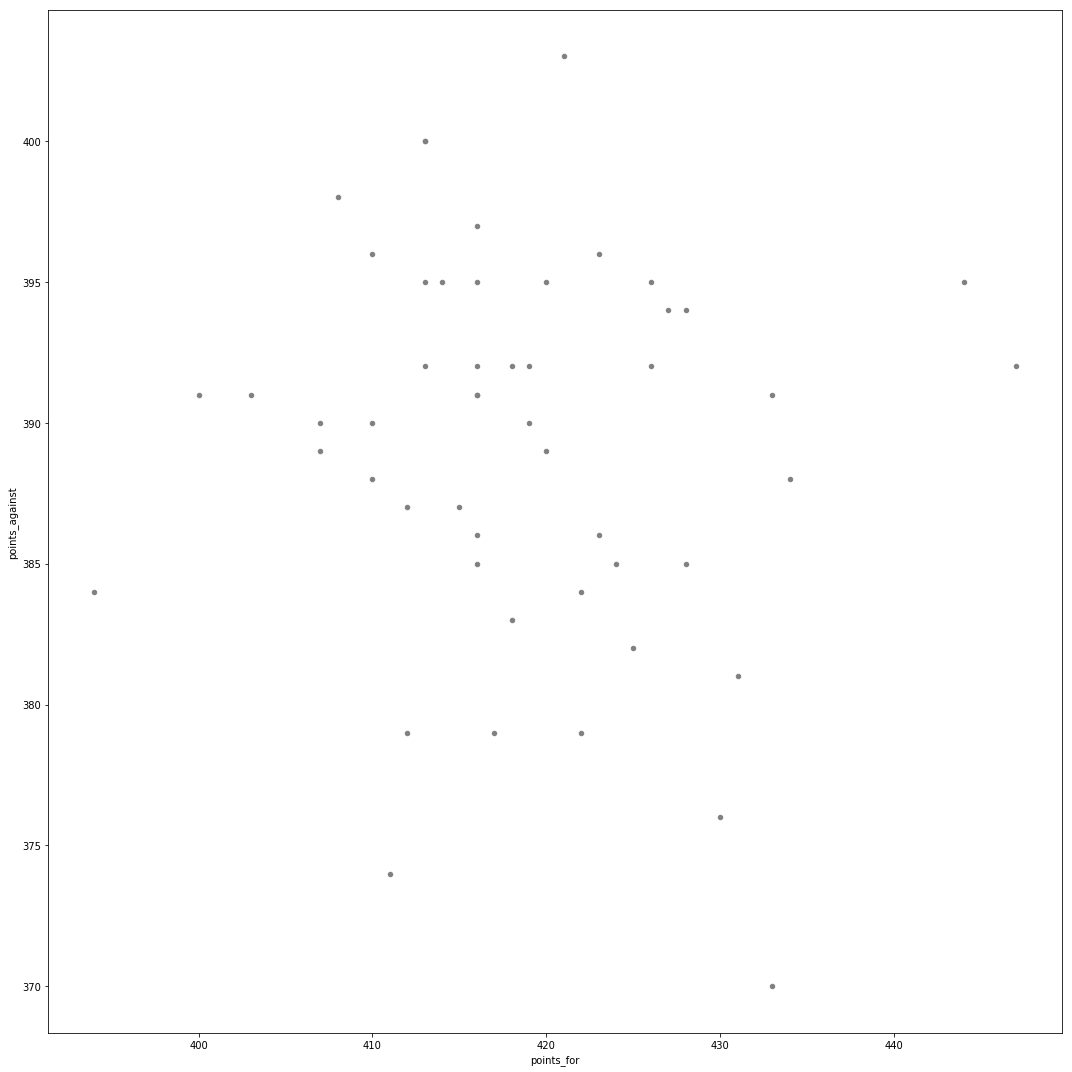

In [58]:
df50.plot(kind='scatter', x='points_for', y='points_against', figsize=(15,15), color='gray')


plt.tight_layout()
plt.savefig("scores.pdf", transparent=True)